#  Final Project Submission: Microsoft Movie Studios Viability Analysis 
__(Phase 1)__

***
- Student Name: Tenicka Norwood
- Program Pace: self paced 
- Scheduled Project Review time: 10/26/2022 
- Instructor name: Joe Comeaux
- Blog post Url: 


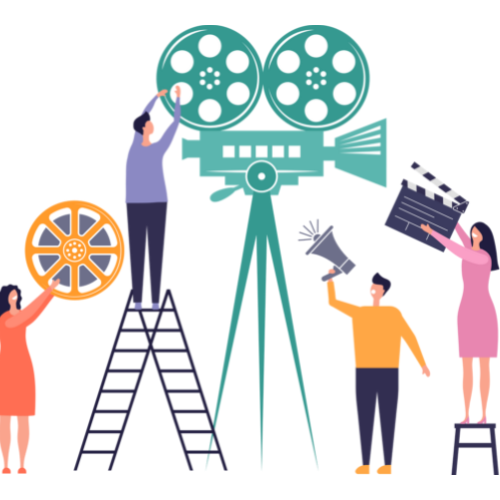
Photo by: Crownlab on [Canva](http://www.canva.com)

# Business Understanding
***

Analysts at Business Wire estimate that the global film and video market will reach $410.6 billion by 2030. Microsoft is uniquely situated to leverage its existing technology holidings to redefine the film industry by crafting a one stop shop platform which manages the entire process from preproduction to filming to distribution. Microsoft's executives are in search of actionable ways to ensure successful movies are produced as they launch a new movie studio that is well supported from its onset. 

As a new recruit for the newly formed performance business analysis team at Microsoft, I have been tasked with crafting a plan to make the company's decision to diversify their holdings to include creating original video content at their new movie studio that is both well supported with data and profitable.  The guiding question that I have been tasked to answer through data analysis is: Which types of films historically are the most successful at the box office? 

How do we prevent headlines like:

> __*‘Fantastic Beasts’ turns ‘The Secrets of Dumbledore’ into too much of a snore*__ - Review by Brian Lowry, CNN April 15, 2022

From negatively impacting our bottom line? 

With this in mind, I am working on the following questions:

* When is the best time of year to release a movie?
* Which director makes the most profitable movies?
* Which genres of movies make the most profit at the box office?

# Data Understanding
***

The datasets used in this project are from the following sources:
* [IMDB](https://www.imdb.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [The Numbers](https://www.the-numbers.com/)

There is a variety of information available on the web that can help as I try to identify the tools Microsoft will need to leverage to be a viable contender in the original video content space and compete as a new Movie studio within their brand. This data includes information on movie genres, titles, runtimes, production costs, gross box office revenue both foreign and domestic and release dates. With this data I will drill down for insights related to the impact that time of year, performer and genres have on success of movies at the box office.

# Method 
***
This project will explore data related to current trends in the movie industry. This exploration will include:
* __Importing Relevant libraries__
    - Access code from different modules
* __Data Preparation__
    - Access databases and dataframes useful to this project
    - Investigate data shape and datatype information
    - Drop or impute null values
    - Reduce complexity (ex. join dataframes where necessary, remove or replace missing values, address duplicates data)
* __Addressing Question 1 through Exploratory Data Analysis (EDA)__ 
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* __Addression Question 2 through EDA__
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* __Addressing Question 3 through EDA__
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* __Discussion & Recommendations__
    - Discuss findings
    - Identify next steps based on findings

# Data Preparation
***

## Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement.  The main libraries that will be used within this project include:
- sqlite3: a library that provides a SQL interface that allows accessing and manipulating SQL database
- pandas: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
- numpy: a key library that brings the computationaly power of languages like C to Python
- matplotlib: a comprehensive visualization library
- seaborn: a data visualization library based on matplotlib 

In [ ]:
# Import libraries and visualization packages
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
# Create a connection to the imdb database
conn = sqlite3.connect('zippedData/im.db/im.db')

##  Accessing databases and dataframes
***
Review data shape and statistics. IMDB data is in a database and has multiple tables which have a column called movie_id that allows them to be combined. These tables include genres, primary titles, and runtimes, but do not contain financial information.  Data from The Numbers and Box Office Mojo contain financial information.

In [ ]:
# Read in the data
# Read Data from Box office Mojo
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Select All from Movie Basics
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)

#Explore data from Movie Ratings Table by Selecting all fields
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
#movie_ratings.head()

# Select All from Directors
movie_directors = pd.read_sql("SELECT * FROM directors", conn)

# Select ALL from Persons
movie_persons = pd.read_sql("SELECT * FROM persons", conn)

# Read Data from The Movie Databases
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Read in movie budget data from The Numbers 
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')



In [ ]:
# Preview Box Office Mojo Dataframe
bom_df.head()

In [ ]:
# Remove Future Projects From IMDB Movie Basics
movie_basics = movie_basics[movie_basics['start_year'] < 2022]

In [ ]:
# Display First Five Rows of the movie_basics table for Movies with Release dates prior to this year
movie_basics.head()

In [ ]:
# Information about the shape, datatypes and size of movie_basics dataframe 
movie_basics.info()

In [ ]:
# Preview IMDB directors Table
movie_directors.head()

In [ ]:
# Information about the shape, datatypes and size of movie_directors dataframe 
movie_directors.info()

In [ ]:
# Address missing data replacing null values with placeholder 
movie_persons.head()
movie_persons["primary_profession"].fillna("Unknown", inplace = True)
movie_persons.info()

In [ ]:
# Drop columns birth_year and death_year
movie_persons.drop(labels =["birth_year", "death_year"], axis = 1, inplace = True)
movie_persons.head()

In [ ]:
# Merge directors and persons dataframes
director_names = pd.merge(left = movie_directors, right = movie_persons, left_on = ["person_id"], 
                          right_on = ["person_id"], how = "inner")
director_names.head()

In [ ]:
# Information about the shape, datatypes and size of movie_basics dataframe 
movie_basics.info()

In [ ]:
# Information about the shape, datatypes and size of director_name dataframe 
director_names.info()

In [ ]:
# Preview The Movie Database Movies Dataframe
tmdb_movies_df.head()

While there are 146101 rows and 6 columns in the movie basics data. I notice that __three of those rows have missing values__:

- genres
- runtime_minutes
- original_title 

In [ ]:
# Remove Unnamed column
tmdb_movies_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

In [ ]:
# Print the number of missing values for each column
print("The number of missing rows in the genres column of the movie_basics dataframe is:", 
         len(movie_basics[movie_basics["genres"].isna()]),'.')
print("The number of missing rows in the runtime_minutes column of the movie_basics dataframe is", 
         len(movie_basics[movie_basics["runtime_minutes"].isna()]),'.')
print("The number of missing rows in the original_title colum of the movie_basics dataframe is", 
         len(movie_basics[movie_basics["original_title"].isna()]),'.')

Since **there are only 21 __(~ 0.01 % of column data)__ rows of missing data** in the original_title column, we can delete these rows without skewing our results. 

In [ ]:
# Address Missing values in movie_basics original_title column
movie_basics.dropna(subset =["original_title"], inplace = True)

In [ ]:
# Check the shape of the data
movie_basics.shape

Now that I deleted the rows that were missing original_title data, I will check to see if the features have changed by using .info().

In [ ]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

There are 31699 rows of missing data in the runtime_minutes column which means that __only ~78% of movies have a known run time in minutes__ so I will replace the null values with the median value of the runtime_minutes column the dataframe. 

In [ ]:
# Address Missing Row values in runtime_minutes column
movie_basics["runtime_minutes"].fillna(movie_basics["runtime_minutes"].median(), inplace = True)

In [ ]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

Now the movie_basics dataframe has *5 out of 6 columns* without any missing values. This leaves the genres column which has 5408 missing rows of data. While this represents ~3.7% of the data in the column, we do not want to drop this data since it may have an affect on our results.

In [ ]:
# Get value counts of movie genres from movie_basics dataframe
movie_basics["genres"].value_counts()
movie_basics["genres"].value_counts().head(20)

In [ ]:
# Address missing genres values with placeholder called Missing.
movie_basics["genres"].fillna("Missing", inplace = True)

In [1]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

NameError: name 'movie_basics' is not defined

Now the movie_basics dataframe has __6 columns of data__ each with 146080 entries and __no missing data.__

There are several movies listed under two or more genres. For example there 3519 movies that are listed under both Comedy and Drama and 1028 movies listed under three genres (Biography, Documentary and Drama) for the same movie. 

In [3]:
# Address movies listed under multiple genres
movie_basics["multi_genre"] = movie_basics["genres"].str.split(",")
movie_basics.head()

NameError: name 'movie_basics' is not defined

In [ ]:
# Explode genre list into new rows
exploded_movie_basics = movie_basics.explode("multi_genre")
exploded_movie_basics.head()

In [ ]:
# Get the descriptive statistics for averagerating
movie_ratings["averagerating"].describe()

In [ ]:
# Get the Runtimes of movies by genre
grouped_movies_by_genre = exploded_movie_basics.groupby("multi_genre")
rm_stats = grouped_movies_by_genre["runtime_minutes"].describe()
rm_stats

In [ ]:
# Information about the shape, datatypes and size of dataframe 
movie_ratings.info()

In [ ]:
# Get movie_ratings statistics
movie_ratings["averagerating"].describe()

Now I will remove movie ratings that are rated 6 or lower, since the mean and median values are **6.33** and **6.50** respectively.

In [ ]:
# Filter movie_ratings
filtered_movie_ratings = movie_ratings[movie_ratings["averagerating"] <= 6]
filtered_movie_ratings.info()

In [ ]:
# Preview The Numbers movie_budgets Dataframe
tn_movie_budgets_df.head()

In [ ]:
# Convert columns to data time 
tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])
tn_movie_budgets_df["release_year"] = tn_movie_budgets_df['release_date'].dt.year
tn_movie_budgets_df["release_month"] = tn_movie_budgets_df['release_date'].dt.month
tn_movie_budgets_df.drop("release_date", axis = 1, inplace = True)

In [ ]:
# Review the shape and datatype information of The numbers movie_budgets dataframe
tn_movie_budgets_df.info()

In [ ]:
# Remove $ and , from Entire Dataframe
tn_movie_budgets_df = tn_movie_budgets_df.replace({"\$":""}, regex = True)
tn_movie_budgets_df = tn_movie_budgets_df.replace({"\,":""}, regex = True)

In [ ]:
# Inspect first five rows of movie_budgets dataframe
tn_movie_budgets_df.head()

In [ ]:
# Replace production_budget, domestic_gross and worldwide_gross with float values in Millions of $
tn_movie_budgets_df["production_budget"] = pd.to_numeric(tn_movie_budgets_df["production_budget"])
tn_movie_budgets_df["domestic_gross"] = pd.to_numeric(tn_movie_budgets_df["domestic_gross"])
tn_movie_budgets_df["worldwide_gross"] = pd.to_numeric(tn_movie_budgets_df["worldwide_gross"])
tn_movie_budgets_df.info()

In [ ]:
# Create a new column called worldwide_profit
tn_movie_budgets_df["worldwide_profit"] = (tn_movie_budgets_df["worldwide_gross"]-tn_movie_budgets_df["production_budget"])

# Create a new column called ROI
tn_movie_budgets_df["ROI"] = tn_movie_budgets_df["worldwide_profit"]/tn_movie_budgets_df["production_budget"] *100
tn_movie_budgets_df.head()
tn_movie_budgets_df = tn_movie_budgets_df.sort_values("release_month")
tn_movie_budgets_df.head()

In [ ]:
## Merge the imdb movie_basics and movie_ratings dataframes
#imdb_df = pd.merge(left = movie_basics, right = filtered_movie_ratings, how = 'left', left_on = "movie_id",
#                      right_on = "movie_id")
#imdb_df.head()
tn_and_imdb = pd.merge(left = tn_movie_budgets_df, right = movie_basics, left_on = ["movie", "release_year"], 
                          right_on = ["primary_title", "start_year"], how = "inner")
tn_and_imdb.head()

In [ ]:
# Replace null values for runtime_minutes with median value
tn_and_imdb["runtime_minutes"].fillna(tn_and_imdb["runtime_minutes"].median(), inplace = True)
tn_and_imdb.info()

In [ ]:
# Review Statistics of combined dataframe
tn_and_imdb.describe()

In [ ]:
# Sort and filter combined tn and imdb dataframe on ROI
tn_and_imdb.head()
tn_and_imdb.sort_values("worldwide_profit", ascending = False)
filtered_movie_ROI_df = tn_and_imdb[tn_and_imdb["production_budget"] >= 2000000]
filtered_movie_ROI_df.info()

In [ ]:
# Merge tn and imdb combined data frame and director_names dataframes
tn_and_imdb_full = pd.merge(left = tn_and_imdb, right = director_names, left_on = ["movie_id"], 
                          right_on = ["movie_id"], how = "inner")
tn_and_imdb_full.rename(columns = {"primary_name": "director"}, inplace = True)

In [ ]:
# Create a new dataframe 
budgets_by_month_df = tn_movie_budgets_df.groupby("release_month").mean()

budgets_by_month_df = budgets_by_month_df.reset_index()
budgets_by_month_df = budgets_by_month_df.sort_values("release_month")

month_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
budgets_by_month_df["month_name"] = month_dict.values()
budgets_by_month_df["id"] = budgets_by_month_df["id"].astype(int)

In [ ]:
# Find shape of budgets_by_month data frame
budgets_by_month_df.shape

In [ ]:
# Merge the bom and tn data into single dataframe
bom_and_tn = pd.merge(left = bom_df, right = tn_movie_budgets_df, left_on = ["title", "year"], 
                        right_on = ["movie", "release_year"])

bom_and_tn.head()

# Exploratory Data Analysis Q1

## When is the best time of year to release a movie?

In [ ]:
## Investigate the relationship between release_month and worldwide gross profit for the top 100 grossing films
# Set up theme
plt.style.use('fivethirtyeight')
# Set up Parameters
# Create plot variables
values = np.array(budgets_by_month_df.month_name)
labels = np.array(budgets_by_month_df.worldwide_profit)/10000000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = values, y = labels, palette = clrs)
ax.set_title("Figure 6.1: Worldwide Profit vs Release Month for the Top 100 Grossing films", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Release Month", fontsize = '14', weight = 'bold')
ax.set_ylabel("World Wide Profit ($10 M)", fontsize = '14', weight = 'bold');
for bar in ax.patches:
    if bar.get_height() < 1:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

In [ ]:
# Print out the name of the column and the Pearson correlation of 
# the column most positively correlated with ROI 
correlation_values = filtered_movie_ROI_df.corr()["ROI"].sort_values()
print("The column with the most positive correlation with ROI is worldwide profit")

In [ ]:
# Find correlations in filtered_movie_ROI dataframe
filtered_movie_ROI_df.corr().style.background_gradient(cmap="Blues")

In [ ]:
# Rough filter of prior correlation investigating dataframe
new_filtered_movie_ROI_df = filtered_movie_ROI_df[filtered_movie_ROI_df["production_budget"] >= 175000000]
new_filtered_movie_ROI_df.describe()

In [ ]:
# Look at the filtered_movie_ROI dataframe
filtered_movie_ROI_df.info()

In [ ]:
# Rough filter of prior correlation investigating dataframe upper limit
new_filtered_movie_ROI_df = new_filtered_movie_ROI_df[new_filtered_movie_ROI_df["production_budget"] <= 250000000]
new_filtered_movie_ROI_df.info()

In [ ]:
# Set up theme
sns.set_theme(style="darkgrid", palette="Set2")
x_values = new_filtered_movie_ROI_df.production_budget
y_values = new_filtered_movie_ROI_df.worldwide_gross

# Set up plot
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(x = x_values, y = "worldwide_gross", data = new_filtered_movie_ROI_df.head(100), alpha=0.7, color="blue")
ax.set_title("Figure 6.2: Worldwide Gross Revenue vs Production Budget", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Production Budget: (Millions of Dollars)", fontsize = 14, weight = 'bold')
ax.set_ylabel("Worldwide Gross Revenue: (Millions of Dollars)", fontsize = 14, weight = 'bold');
ax.ticklabel_format(style = "plain")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.4g}'.format(x/100000000)))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.4g}'.format(x/100000000)))

In [ ]:
# Plot the relationship between production budget and ROI for films with production budgets between $175 and $250 Million.
# Set up theme
#sns.set_theme(style="darkgrid", palette="Set2")

# Create plot variables
data = new_filtered_movie_ROI_df.head(100)
values = np.array(data.ROI)
labels = np.array(data.production_budget)/1000000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.boxplot(x = labels, y = values, palette = clrs)
ax.set_title("Figure 6.3: ROI vs Production Budget", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Production Budget: (Millions of Dollars)", fontsize = '14', weight = 'bold')
ax.set_ylabel("ROI (% return on production budget)", fontsize = '14', weight = 'bold');

# Exploratory Data Analysis Q2

## Investigating the relationship between directors and WorldWide Profit

In [ ]:
# Create a new dataframe that has worldwide_profit and directors
tn_and_imdb_full.info()
worldwide_profit_directors_df = tn_and_imdb_full.loc[:, ["director","primary_title", "production_budget",  "worldwide_profit","ROI"
                                         , "release_month", "start_year"]]


In [ ]:
# Group by director and worldwide_profit
sorted_ww_profit_directors = worldwide_profit_directors_df.sort_values("worldwide_profit", ascending = False)
sorted_ww_profit_directors = sorted_ww_profit_directors.drop_duplicates()
top_100_movies_by_wwprofit = sorted_ww_profit_directors.head(100)

In [ ]:
# Set up theme
# Set up Parameters
# Create plot variables
values = np.array(top_100_movies_by_wwprofit.head(10).director)
labels = np.array(top_100_movies_by_wwprofit.head(10).worldwide_profit)
sns.set(font_scale = 1.75)
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]
# Set up plot figure size
plt.figure(figsize =(16,15))
ax = sns.barplot(y = values, x = labels, palette = clrs)
ax.set_title("Figure 6.3: Top 10 Directors by Worldwide Profit", weight = 'bold').set_fontsize('30')
ax.set_ylabel("Director Name", fontsize = '25', weight = 'bold')
ax.set_xlabel("Worldwide Profit ($1M)", fontsize = '25', weight = 'bold');
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:.4g}'.format(x/10000000)))
for bar in ax.patches:
    if bar.get_width() < 1150000000:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

# Exploratory Data Analysis Q3

## Which genres of movies make the most profit at the box office?

In [ ]:
# Investigating the relationship between Genre and Worldwide Profit
# Create a smaller dataframe to investigate production cost by genre
genre_budget_df = tn_and_imdb.loc[:, ["multi_genre","primary_title", "production_budget",  "worldwide_profit","ROI"
                                         , "release_month"]]
genre_budget_df.head(20)


In [ ]:
# Review correlations on filtered dataset
plt.figure(figsize =(14,10))
ax = sns.heatmap(filtered_movie_ROI_df.corr(), annot = True, cmap = 'Blues')

In [ ]:
# Explode genres 
exploded_genre_budget_df = genre_budget_df.explode("multi_genre")
exploded_genre_budget_df.head(20)

In [ ]:
# Group by multi_genre by production budget
grouped_genre_budget = exploded_genre_budget_df.groupby("multi_genre")["production_budget"].median()
grouped_genre_budget.head(20)

In [ ]:
# Create a dataframe from the series
grouped_genre_budget_df = grouped_genre_budget.to_frame(name = "production_budget").reset_index()
grouped_genre_budget_df.head(20)

In [ ]:
# Sort by Production Budget 
grouped_genre_budget_df.sort_values("production_budget", ascending = False)

In [ ]:
# Count unique elements in each column
exploded_genre_budget_df.nunique()

In [ ]:
# Sort the dataframe
exploded_genre_budget_df.sort_values("worldwide_profit", ascending = False)
exploded_genre_budget_df.head()

In [ ]:
# Group by multi_genre by production budget
grouped_genre_ww_profit = exploded_genre_budget_df.groupby("multi_genre")["worldwide_profit"].median()

In [ ]:
# Create a dataframe from the series
grouped_genre_ww_profit_df = grouped_genre_ww_profit.to_frame(name = "worldwide_profit").reset_index()
grouped_genre_ww_profit_df.head()

In [ ]:
# Set up theme
#sns.set_theme(style="darkgrid", palette="Set2")
# Set up Parameters
# Create plot variables
values = np.array(grouped_genre_ww_profit_df.multi_genre)
labels = np.array(grouped_genre_ww_profit_df.worldwide_profit)/1000000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(y = values, x = labels, palette = clrs)
ax.set_title("Figure 6.3: Median Worldwide Profit by Genre", weight = 'bold').set_fontsize('16')
ax.set_ylabel("Genre", fontsize = '14', weight = 'bold')
ax.set_xlabel("Median World Wide Profit ($1M)", fontsize = '14', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 45:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

In [ ]:
# Group by multi_genre by production budget
month_grouped_genre_median_ww_profit = exploded_genre_budget_df.groupby(["release_month","multi_genre"])["worldwide_profit"].median().unstack().transpose()

In [ ]:
# Look at first five rows of the grouped dataframe
month_grouped_genre_median_ww_profit.head()

In [ ]:
# Identify best genre for each month
month_grouped_genre_median_ww_profit.style.highlight_max(color = "cyan", axis = 0)

In [ ]:
# Setup plot variales
x = month_grouped_genre_median_ww_profit.index
january =  month_grouped_genre_median_ww_profit[1]/100000
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(14,10))
ax = sns.barplot(x = january, y = x ,palette = clrs )
ax.set_title("Figure 6.3: Median WorldWide Profit By Genre", weight = 'bold').set_fontsize('12')
ax.set_ylabel("Genre", fontsize = '12', weight = 'bold')
ax.set_xlabel("Median World Wide Profit (Millions of Dollars)", fontsize = '12', weight = 'bold');
for bar in ax.patches:
    if bar.get_width() < 600:
        bar.set_color('grey')
    else:
        bar.set_color('blue')
        

# Conclusions
***

From Figure 6.2 the most ideal production cost is **210 million dollars**. In this figure ROI is calculated by dividing worlwide profit by the production cost and multiplying by 100.
\begin{equation*}
ROI  =\frac{\text{worldwide profit}}{\text{production budget}} * 100
\end{equation*}

In Figure 8.1 I looked at the relationship between production budget and worlwide gross for the top 100 grossing films in my dataset. As a business, we want to get the largest revenue while minimizing production costs. From figure 2.1 I noticed that while the median production cost is around 20 million dollars, __production costs of around 200 million dollars have the most consistent worldwide profit__.
In fact more films that had production budgets of over 100 million but less than 250 million dollars saw worldwide gross revenue of 500 million dollars or more than any other movies in the top 100 highest grossing movies in my dataset. While movies over 400 million dollars seem to generate at least the same amount of worldwide revenue as the production costs, the number of movies in this category seem to be outliers. 